In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def rotate_img(_img, _degree, _scale): # 旋转矩阵
    height = _img.shape[0]
    width = _img.shape[1]
    matRotate = cv2.getRotationMatrix2D((height * 0.5, width * 0.5), _degree, _scale)  # mat rotate 1 center 2 angle 3 缩放系数
    dst = cv2.warpAffine(_img, matRotate, (height, width))
    return dst
img = cv2.imread("people.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

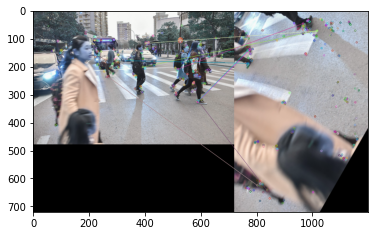

In [4]:
def sift_match(img):#特征匹配
    img_rotate = rotate_img(img, 60, 2)
    sift = cv2.ORB_create()#定位关键点
    keypoints1, desc1 = sift.detectAndCompute(img, None)
    keypoints2, desc2 = sift.detectAndCompute(img_rotate, None)
    bf = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE)
    matches = bf.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    result = cv2.drawMatches(img, keypoints1, img_rotate, keypoints2, matches[:10], None)
    plt.imshow(result)
    plt.show()
sift_match(img)

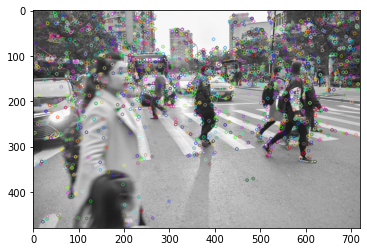

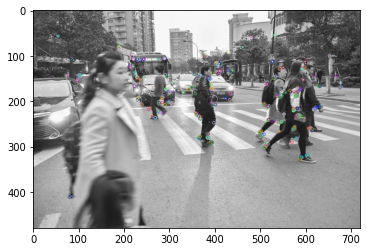

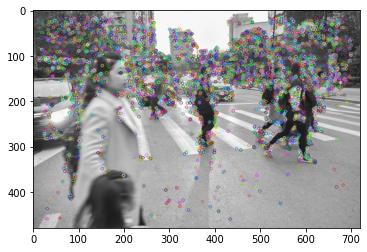

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


In [10]:
def Feature_description(gray,img,category):
    if category == 1:
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif category == 2:
        descriptor = cv2.ORB_create()
    elif category == 3:
        descriptor = cv2.BRISK_create() 
    else:
        descriptor = cv2.xfeatures2d.SURF_create()  
    keypoints = descriptor.detect(gray, None)
    img = cv2.drawKeypoints(gray, keypoints, img)
    plt.imshow(img)
    plt.show()
Feature_description(gray,img1,1)
Feature_description(gray,img1,2)
Feature_description(gray,img1,3)
Feature_description(gray,img1,4)